In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# this allows plots to appear directly in the notebook
%matplotlib inline

In [32]:
fuel = pd.read_csv('Fuel Efficiciency/Fuel_FO_2010-17_lr.csv', sep = ';',index_col=None,encoding='latin-1')
fuel.head(5)

,IN,Train_Bulletin,Sector,DateTime1,Id_Loc,Track_id,Id_Engineer,Id_fireman,Hours,Kilometers,...,id_Type,Type,Traccion,Direction,Id_Model_Loc,Model_Loc,UTC,GTK_T,Net_Ton_Km,Liters_r
0,TREN,32175,N,26/4/2017,5409,1,67.0,252.0,4.63,56.1,...,1,CARGA,S,0,38,GE U20C,UTR,35628557.1,56.1,100.0
1,TREN,32177,N,26/4/2017,11,1,104.0,285.0,2.25,35.1,...,1,CARGA,S,1,9,GE U10B,UTR,21194784.0,14995773.0,100.0
2,TREN,32178,N,26/4/2017,5409,1,67.0,252.0,3.08,56.1,...,1,CARGA,S,1,38,GE U20C,UTR,83729250.0,58905000.0,200.0
3,TREN,32187,N,27/4/2017,6931,1,18.0,286.0,1.75,35.1,...,1,CARGA,S,1,43,HM,UTR,20671794.0,14546844.0,50.0
4,TREN,32188,N,27/4/2017,21,1,72.0,91.0,3.33,56.1,...,1,CARGA,S,0,28,GM,UTR,27692100.0,0.0,100.0


In [33]:
fuel.describe()

,Train_Bulletin,Id_Loc,Track_id,Id_Engineer,Id_fireman,Hours,Kilometers,Liters,Net_Ton_Km_r,Gross_Ton_km,Net_Tons,Gross_Tons,Locomotive,Id_Sub_Type,id_Type,Direction,Id_Model_Loc,GTK_T,Net_Ton_Km,Liters_r
count,89979.000000,89979.000000,89979.000000,89671.000000,88147.000000,89979.000000,89979.000000,89979.000000,8.997900e+04,8.997900e+04,8.997900e+04,8.997900e+04,89979.000000,89979.000000,89979.000000,89979.000000,89979.000000,8.997900e+04,8.997900e+04,89976.000000
mean,17082.630547,1225.903055,3.119672,70.715538,137.286646,9.375831,188.607801,614.518288,9.559076e+07,1.154419e+08,7.744438e+05,1.369274e+06,1494.421143,3.198257,1.834584,0.499872,28.192356,1.239625e+08,5.923357e+07,533.710134
std,8947.810099,2310.180568,6.380091,47.799039,84.836154,4.125602,84.493059,468.272412,1.698431e+08,1.371719e+08,9.129715e+05,1.286901e+06,578.485351,2.647041,1.297241,0.500003,13.805969,1.348983e+08,8.820753e+07,418.986535
min,1315.000000,1.000000,1.000000,7.000000,6.000000,0.000000,0.000000,0.000000,0.000000e+00,-2.305015e+07,0.000000e+00,0.000000e+00,331.000000,1.000000,1.000000,0.000000,9.000000,-2.305015e+07,0.000000e+00,1.000000
25%,9270.000000,8.000000,2.000000,31.000000,69.000000,6.170000,134.200000,190.000000,0.000000e+00,5.961255e+05,2.500000e+04,2.581025e+05,976.000000,2.000000,1.000000,0.000000,9.000000,2.244925e+07,0.000000e+00,150.000000
50%,17462.000000,16.000000,3.000000,64.000000,107.000000,9.900000,239.800000,540.000000,4.831200e+06,5.488639e+07,4.274740e+05,1.125260e+06,1602.000000,2.000000,1.000000,0.000000,38.000000,6.203007e+07,6.337364e+06,400.000000
75%,24763.000000,24.000000,4.000000,100.000000,221.000000,12.000000,261.700000,940.000000,1.373981e+08,1.960827e+08,1.213500e+06,1.975596e+06,2006.000000,3.000000,3.000000,1.000000,38.000000,1.990141e+08,1.041328e+08,900.000000
max,32469.000000,6937.000000,492.000000,297.000000,296.000000,65.170000,293.400000,5230.000000,1.496568e+09,1.511170e+09,6.994160e+06,1.010528e+07,8689.000000,11.000000,4.000000,1.000000,43.000000,1.511170e+09,1.095066e+09,4900.000000


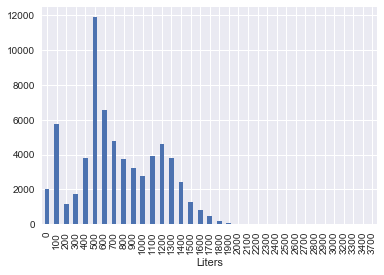

In [34]:
f = fuel
# Filter out Shunting Locomotives, choose only consumption between 40 and 1600 liters and postive GTK
f = f[(f.Liters >40) & (f.IN == 'TREN') & (f.Gross_Ton_km >0)]
# Show the distribution of consumption in 50 liter intervals
f.groupby(f.Liters // 100*100).size().plot(kind='bar')

In [35]:
f['Lts_x_GTK'] = ((f['Liters'] * 1000)/ (f['Gross_Ton_km'] / 1000000)).astype(float)

C:\Users\225648\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [36]:
# create a new Series called IsUnit
f['IsUnit'] = f.UTC.map({'UTR':1,'NUT':0,'PAS':-1})

C:\Users\225648\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [37]:
# Use Training Data, Filter out Shunting Locomotives, choose only consumption between 40 and 1300 liters, postive GTK, 6 main track, less than two days
f = f[(f.UTC == 'UTR') & (f.IN == 'TREN') & (f.Gross_Ton_km >0) & (f.Track_id <=6) & (f.Hours < 48)]
#f.groupby(['UTC','Sub_Type','Direction','Traccion','Track_id','Model_Loc']).size()
#f.groupby(['UTC','Sub_Type','Track_id','Model_Loc']).size()
f_agg = f.groupby(['UTC','Sub_Type','Model_Loc','Track_id','Direction']).size()
f_agg.nlargest(10)

UTC  Sub_Type               Model_Loc  Track_id  Direction
UTR  CARGA GENERAL          GE U20C    3         0            4757
                                       2         0            4528
                                       4         0            4478
                                       3         1            3407
                                       2         1            3260
                                       4         1            3223
     DERIVADOS DE PETROLEO  GE U20C    2         1            1635
                                       3         1            1632
                                       4         1            1586
     CARGA GENERAL          GM         1         1            1094
dtype: int64

In [38]:
f_tot = fuel[(fuel.Sector == 'E') & (fuel.Sub_Type == 'CARGA GENERAL') & (fuel.Model_Loc == 'GE U20C') & (fuel.UTC == 'UTR') & (fuel.IN == 'TREN') & (fuel.Direction == 0.0) & (fuel.Traccion == 'S') & fuel.Gross_Ton_km > 0]
f_tot['Lts_x_GTK'] = ((f_tot['Liters'] * 1000)/ (f_tot['Gross_Ton_km'] / 1000000)).astype(float)
f_tot.groupby(['UTC','Sub_Type','Model_Loc','Track_id']).size()



C:\Users\225648\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


UTC  Sub_Type       Model_Loc  Track_id
UTR  CARGA GENERAL  GE U20C    2           1728
                               3           1773
                               4           1787
                               418            3
                               492            1
dtype: int64

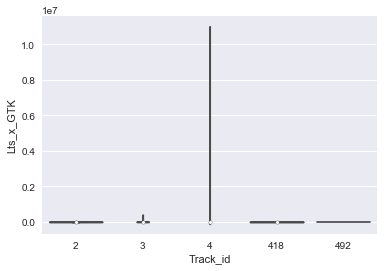

In [39]:

# A violin plot 
# Let's reduce the division to Cargo, Locomotive, Origin
sns.violinplot(x="Track_id", y="Lts_x_GTK", data=f_tot, size=60)

In [40]:
# Use Training Data, Filter out Shunting Locomotives, choose only consumption between 40 and 1300 liters, postive GTK, 6 main track, less than two days

#f = f[(f.Sector == 'E') & (f.Sub_Type == 'CARGA GENERAL') & (f.Model_Loc == 'GE U20C') & (f.Liters >40) & (f.Liters < 3000) & (f.UTC == 'UTR') & (f.IN == 'TREN') & (f.Gross_Ton_km >0) & (f.Track_id <=6) & (f.Hours < 48) & (f.Lts_x_GTK < 12000)]

#f = f[(f.Sector == 'E') & (f.Sub_Type == 'CARGA GENERAL') & (f.Model_Loc == 'GE U20C') & (f.Liters >40) & (f.UTC == 'UTR') & (f.IN == 'TREN') & (f.Gross_Ton_km >0) & (f.Direction == 0.0) & (f.Traccion == 'S') & (f.Track_id <=6) & (f.Hours < 48) & (f.Lts_x_GTK < 13000)]

f = f[(f.Sector == 'E') & (f.Liters >40) & (f.UTC == 'UTR') & (f.IN == 'TREN') & (f.Gross_Ton_km >0) & (f.Traccion == 'S') & (f.Track_id <=6) & (f.Hours < 48) & (f.Lts_x_GTK < 13000)]

f.groupby(['UTC','Sub_Type','Model_Loc','Track_id']).size()

UTC  Sub_Type               Model_Loc  Track_id
UTR  CARGA GENERAL          GE C23EMP  2            797
                                       3            757
                                       4            890
                            GE U10B    2            228
                                       3            719
                                       4            157
                            GE U20C    2           3993
                                       3           3757
                                       4           3838
                            GM         2            604
                                       3            880
                                       4            496
     DERIVADOS DE PETROLEO  GE C23EMP  2            249
                                       3            251
                                       4            236
                            GE U10B    2             67
                                       3             83


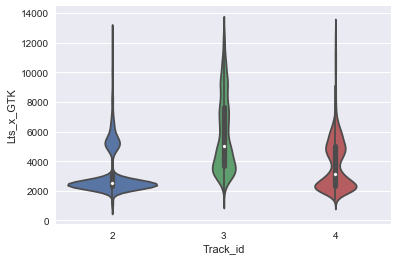

In [41]:
# A violin plot 
# Let's reduce the division to Cargo, Locomotive, Origin
sns.violinplot(x="Track_id", y="Lts_x_GTK", data=f, size=60)

In [42]:
# percentaje of observations excluding GTK < 0
z = f
z = z[(z.Gross_Ton_km <=0)]
len(f)/(len(f_tot)-len(z))


4.812547241118669

In [43]:
f.describe()

,Train_Bulletin,Id_Loc,Track_id,Id_Engineer,Id_fireman,Hours,Kilometers,Liters,Net_Ton_Km_r,Gross_Ton_km,...,Locomotive,Id_Sub_Type,id_Type,Direction,Id_Model_Loc,GTK_T,Net_Ton_Km,Liters_r,Lts_x_GTK,IsUnit
count,25468.000000,25468.000000,25468.000000,25447.000000,25034.000000,25468.000000,25468.000000,25468.000000,2.546800e+04,2.546800e+04,...,25468.000000,25468.000000,25468.0,25468.000000,25468.000000,2.546800e+04,2.546800e+04,25468.000000,25468.000000,25468.0
mean,17880.531216,1905.270653,2.987082,68.055802,130.390349,11.218246,207.496494,982.260876,1.649026e+08,2.748128e+08,...,1914.273323,2.327941,1.0,0.581710,32.813256,2.748128e+08,1.399852e+08,898.760955,4335.921911,1.0
std,9012.763110,2859.456708,0.806401,45.591990,80.709830,3.423767,57.656750,352.819440,1.322485e+08,1.294429e+08,...,351.506804,0.469472,0.0,0.493288,10.897247,1.294429e+08,1.085874e+08,284.624611,2334.129788,0.0
min,1323.000000,1.000000,2.000000,8.000000,6.000000,0.020000,0.000000,270.000000,0.000000e+00,3.404964e+07,...,966.000000,2.000000,1.0,0.000000,9.000000,3.404964e+07,0.000000e+00,1.000000,988.298071,1.0
25%,10342.000000,5.000000,2.000000,31.000000,69.000000,8.100000,134.200000,700.000000,5.083119e+07,1.801194e+08,...,2001.000000,2.000000,1.0,0.000000,38.000000,1.801194e+08,3.977307e+07,700.000000,2464.422707,1.0
50%,18487.000000,10.000000,3.000000,60.000000,103.000000,11.820000,239.800000,860.000000,1.548993e+08,2.596862e+08,...,2006.000000,2.000000,1.0,1.000000,38.000000,2.596862e+08,1.318283e+08,900.000000,3557.743143,1.0
75%,25758.000000,5409.000000,4.000000,96.500000,218.000000,13.330000,261.700000,1280.000000,2.356801e+08,3.572134e+08,...,2010.000000,3.000000,1.0,1.000000,38.000000,3.572134e+08,2.151279e+08,1090.000000,5475.342006,1.0
max,32454.000000,6937.000000,4.000000,297.000000,278.000000,46.830000,261.700000,3740.000000,1.496568e+09,1.511170e+09,...,8689.000000,3.000000,1.0,1.000000,40.000000,1.511170e+09,1.095066e+09,4900.000000,12996.880006,1.0


In [44]:
f.dtypes

IN                 object
Train_Bulletin      int64
Sector             object
DateTime1          object
Id_Loc              int64
Track_id            int64
Id_Engineer       float64
Id_fireman        float64
Hours             float64
Kilometers        float64
Liters              int64
Net_Ton_Km_r      float64
Gross_Ton_km      float64
Net_Tons            int64
Gross_Tons          int64
Date               object
Locomotive          int64
Track              object
Maquinista         object
Auxiliar           object
Train_nbr          object
Id_Sub_Type         int64
Sub_Type           object
id_Type             int64
Type               object
Traccion           object
Direction           int64
Id_Model_Loc        int64
Model_Loc          object
UTC                object
GTK_T             float64
Net_Ton_Km        float64
Liters_r          float64
Lts_x_GTK         float64
IsUnit              int64
dtype: object

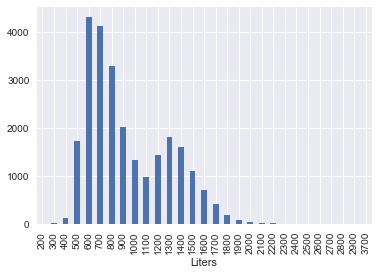

In [45]:
# Show the distribution of consumption in 50 liter intervals
f.groupby(f.Liters // 100*100).size().plot(kind='bar')

In [46]:
cols =list(f.loc[:,'Track_id':'Track_id']) + list(f.loc[:,'Track':'Track']) +list(f.loc[:,'Hours':'Liters']) + ['Lts_x_GTK'] + ['Gross_Ton_km'] 
gtrack= f[cols]
# Show the mean grouped by track
gtrack.groupby(['Track_id', 'Track']).mean()

,,Hours,Kilometers,Liters,Lts_x_GTK,Gross_Ton_km
Track_id,Track,,,,,
2,"SUB DIVISION 2, GU-SJ",12.780454,256.161288,964.735409,3280.165733,3.383289e+08
3,"SUB DIVISION 3, SJ-RO",7.776761,133.086825,876.278782,5796.741447,1.699628e+08
4,"SUB DIVISION 4, RO-CB",13.366998,238.464437,1116.727026,3832.386077,3.237114e+08


In [47]:
# Show the standard deviation grouped by track
gtrack.groupby(['Track_id', 'Track']).std()

,,Hours,Kilometers,Liters,Lts_x_GTK,Gross_Ton_km
Track_id,Track,,,,,
2,"SUB DIVISION 2, GU-SJ",2.480614,25.147245,276.801373,1670.196336,1.263955e+08
3,"SUB DIVISION 3, SJ-RO",2.113670,10.724448,333.331667,2535.257577,6.730472e+07
4,"SUB DIVISION 4, RO-CB",2.308154,12.213957,397.814027,1840.552233,1.110448e+08


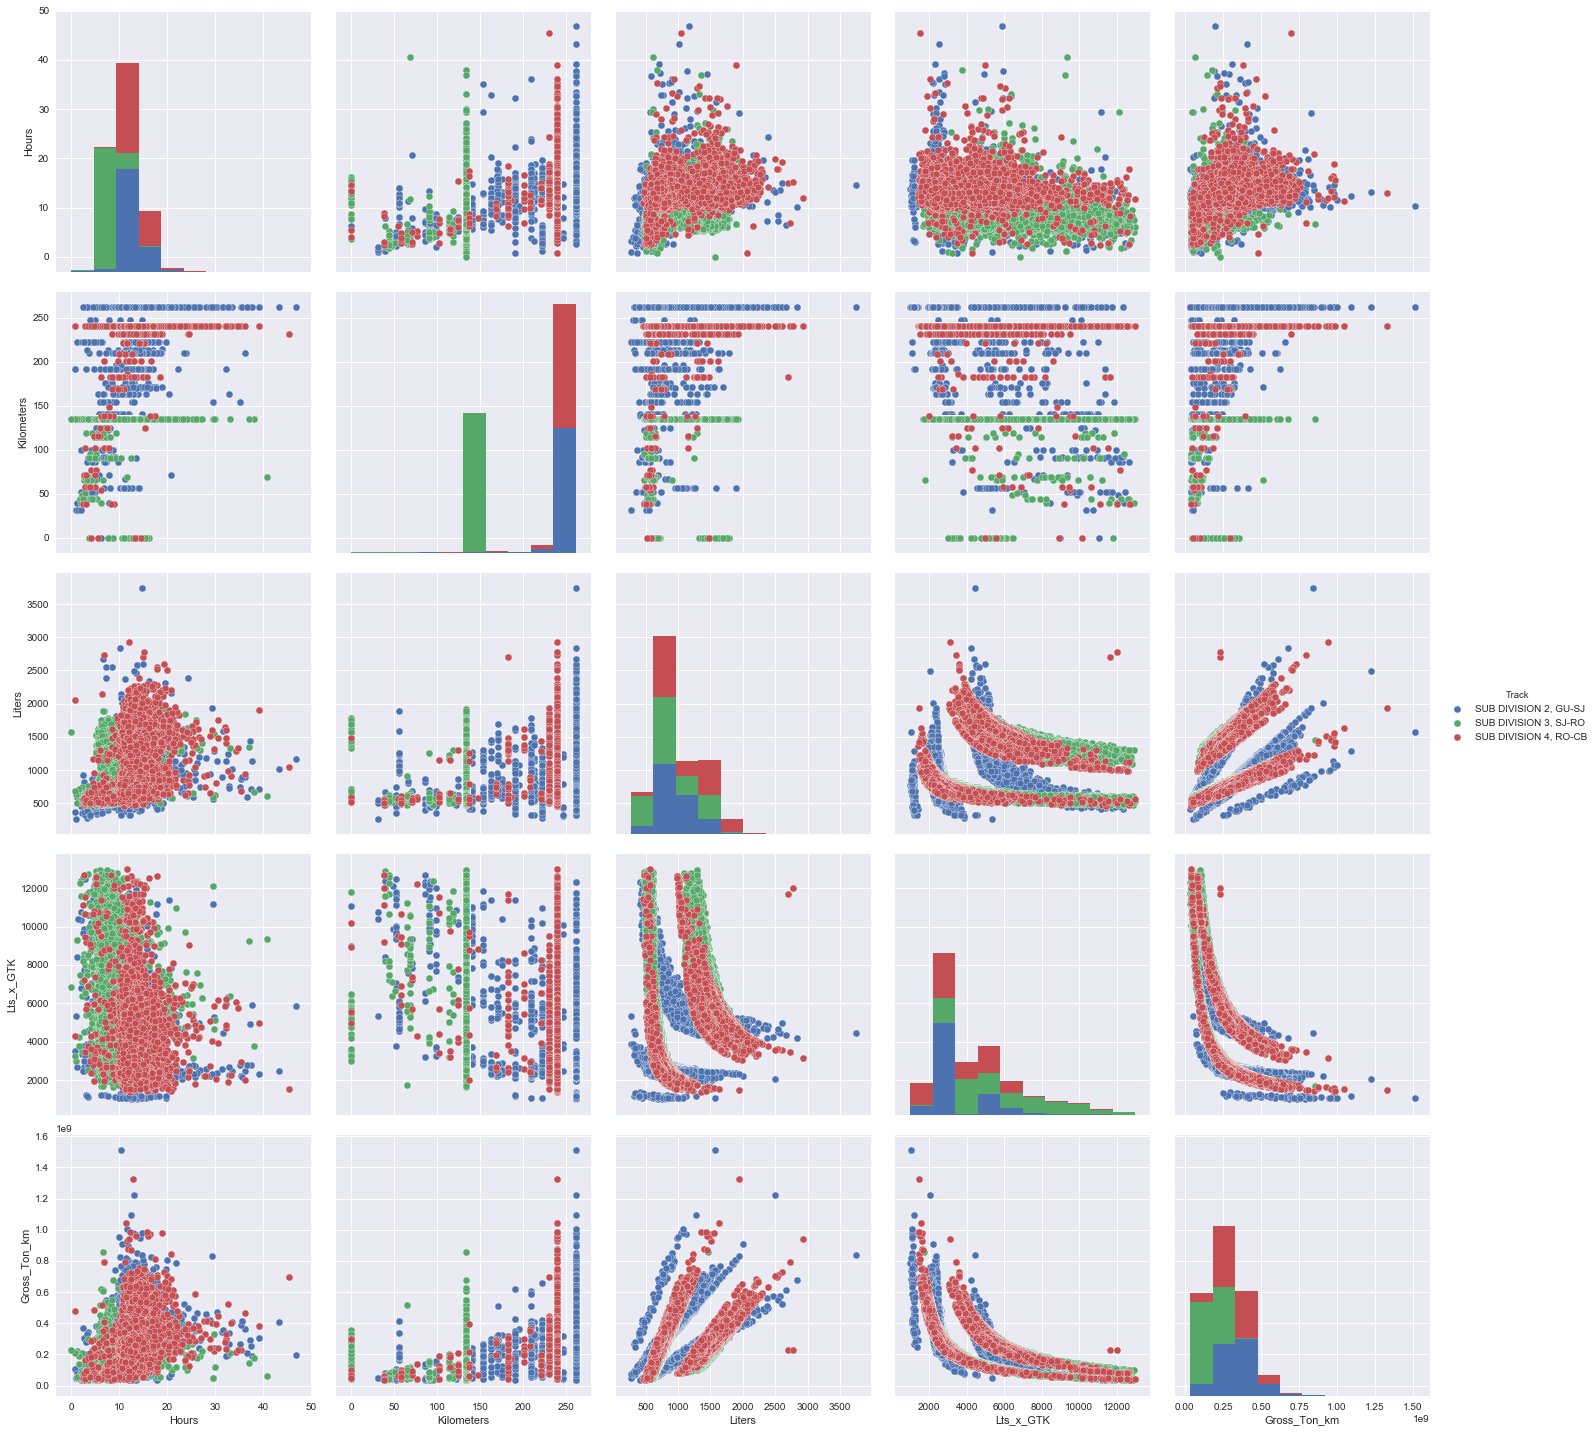

In [48]:
# From the pairplot, we'll see what seperates all pair of selected variables

sns.pairplot(gtrack.drop("Track_id", axis=1), hue="Track", size=4)

In [49]:
fuel.Type.value_counts()

CARGA         61890
PASAJEROS     22492
ESPECIALES     3575
MIXTO          2022
Name: Type, dtype: int64

In [50]:
fuel.Sub_Type.value_counts()

CARGA GENERAL            50133
DERIVADOS DE PETROLEO    11757
EXPRESO ORIENTAL          8445
AUTOMOTOR                 8320
TREN REGIONAL             5727
SERVICIO INTERNO          2451
TREN MIXTO AL SUR         2022
LOCOMOTORA SOLA            930
SOCORRO                    191
ESPECIAL                     3
Name: Sub_Type, dtype: int64

In [51]:
fuel.Model_Loc.value_counts()

GE U20C      37774
GE U10B      25482
GM           15612
FB            6429
GE C23EMP     4650
HM              32
Name: Model_Loc, dtype: int64

In [52]:
fuel.Locomotive.value_counts()

2005    3208
976     3183
2006    3138
331     3133
2008    3129
1202    3087
977     3081
975     3057
2007    3017
1201    3002
2004    3000
973     2976
2003    2966
1601    2945
2010    2943
2000    2927
1602    2917
2002    2904
347     2864
971     2821
2001    2801
2009    2796
972     2631
978     2596
1203    2573
974     2518
979     2464
2011    2147
2012    1926
851     1083
2301     883
2201     872
2302     806
2303     738
2305     647
2304     551
2307     533
2306     492
345      432
966      155
1014      32
8689       5
Name: Locomotive, dtype: int64

In [53]:
fuel.Sector.value_counts()

E    72067
S    13426
N     4486
Name: Sector, dtype: int64

In [54]:
fuel.Direction.value_counts()

0    45001
1    44978
Name: Direction, dtype: int64

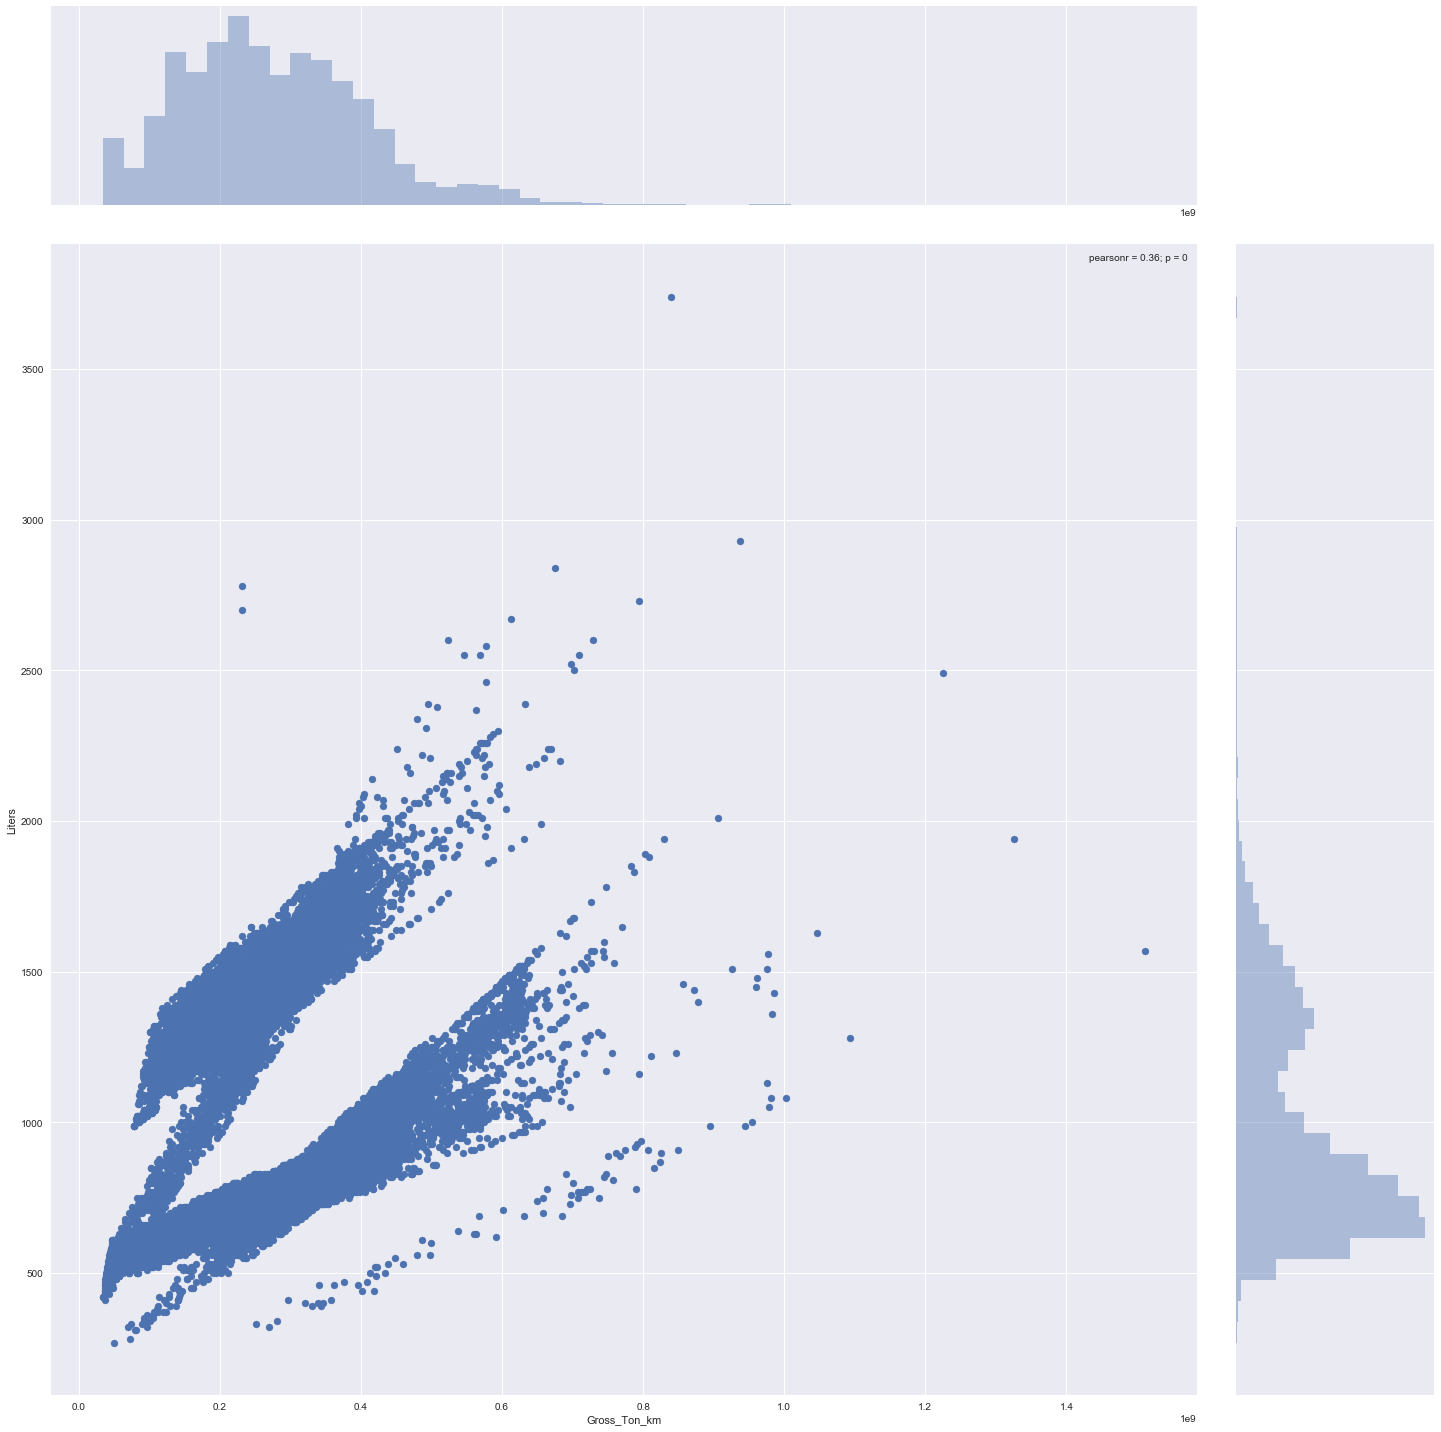

In [55]:
# Show the whole data distribution with a  joint
sns.jointplot(x="Gross_Ton_km", y="Liters", data=f, size=20)

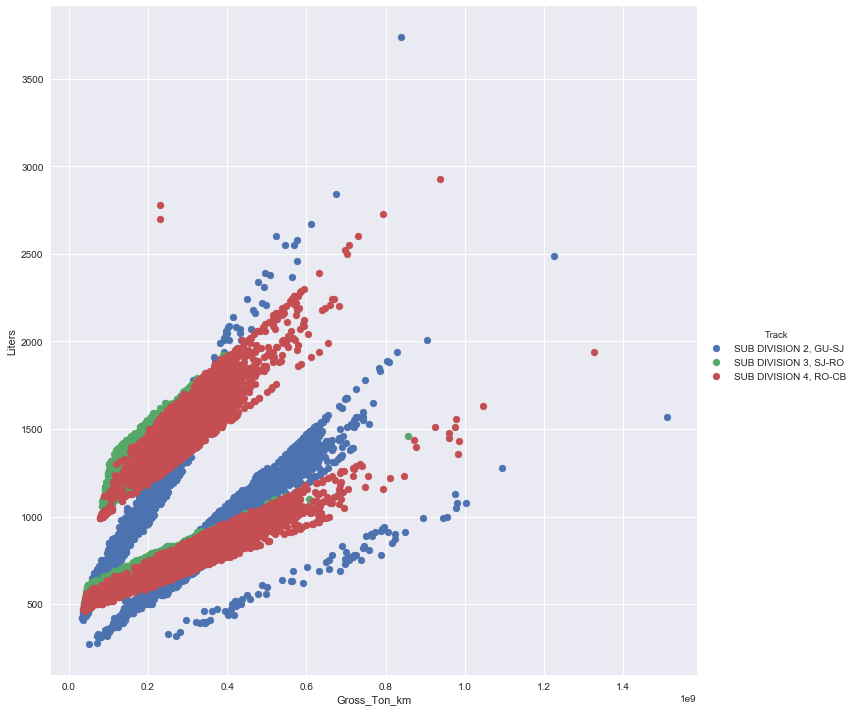

In [56]:
# We'll use seaborn's FacetGrid to color the scatterplot by Track Type
sns.FacetGrid(f, hue="Track", size=10) \
   .map(plt.scatter, "Gross_Ton_km", "Liters") \
   .add_legend()
